# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
'''# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe())'''

In [232]:
# Example importing the CSV here
import pandas as pd 

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.
- Variables:

Pregnancies. Número de embarazos del paciente (numérico)

Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

BMI. Índice de masa corporal (numérico)

DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

Age. Edad del paciente (numérico)

Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

## Paso 2: Exploración y limpieza de datos

In [233]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [234]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

[]
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [235]:
# Obtener las dimensiones
dataframe.shape

(768, 9)

Conclusiones:

Hay 768 registros en el DataFrame y 9 columnas

In [236]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [237]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [238]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

Conclusiones:

No eliminamos ninguna variable porque nos interesan todas

## Paso 3: Análisis de variables univariante

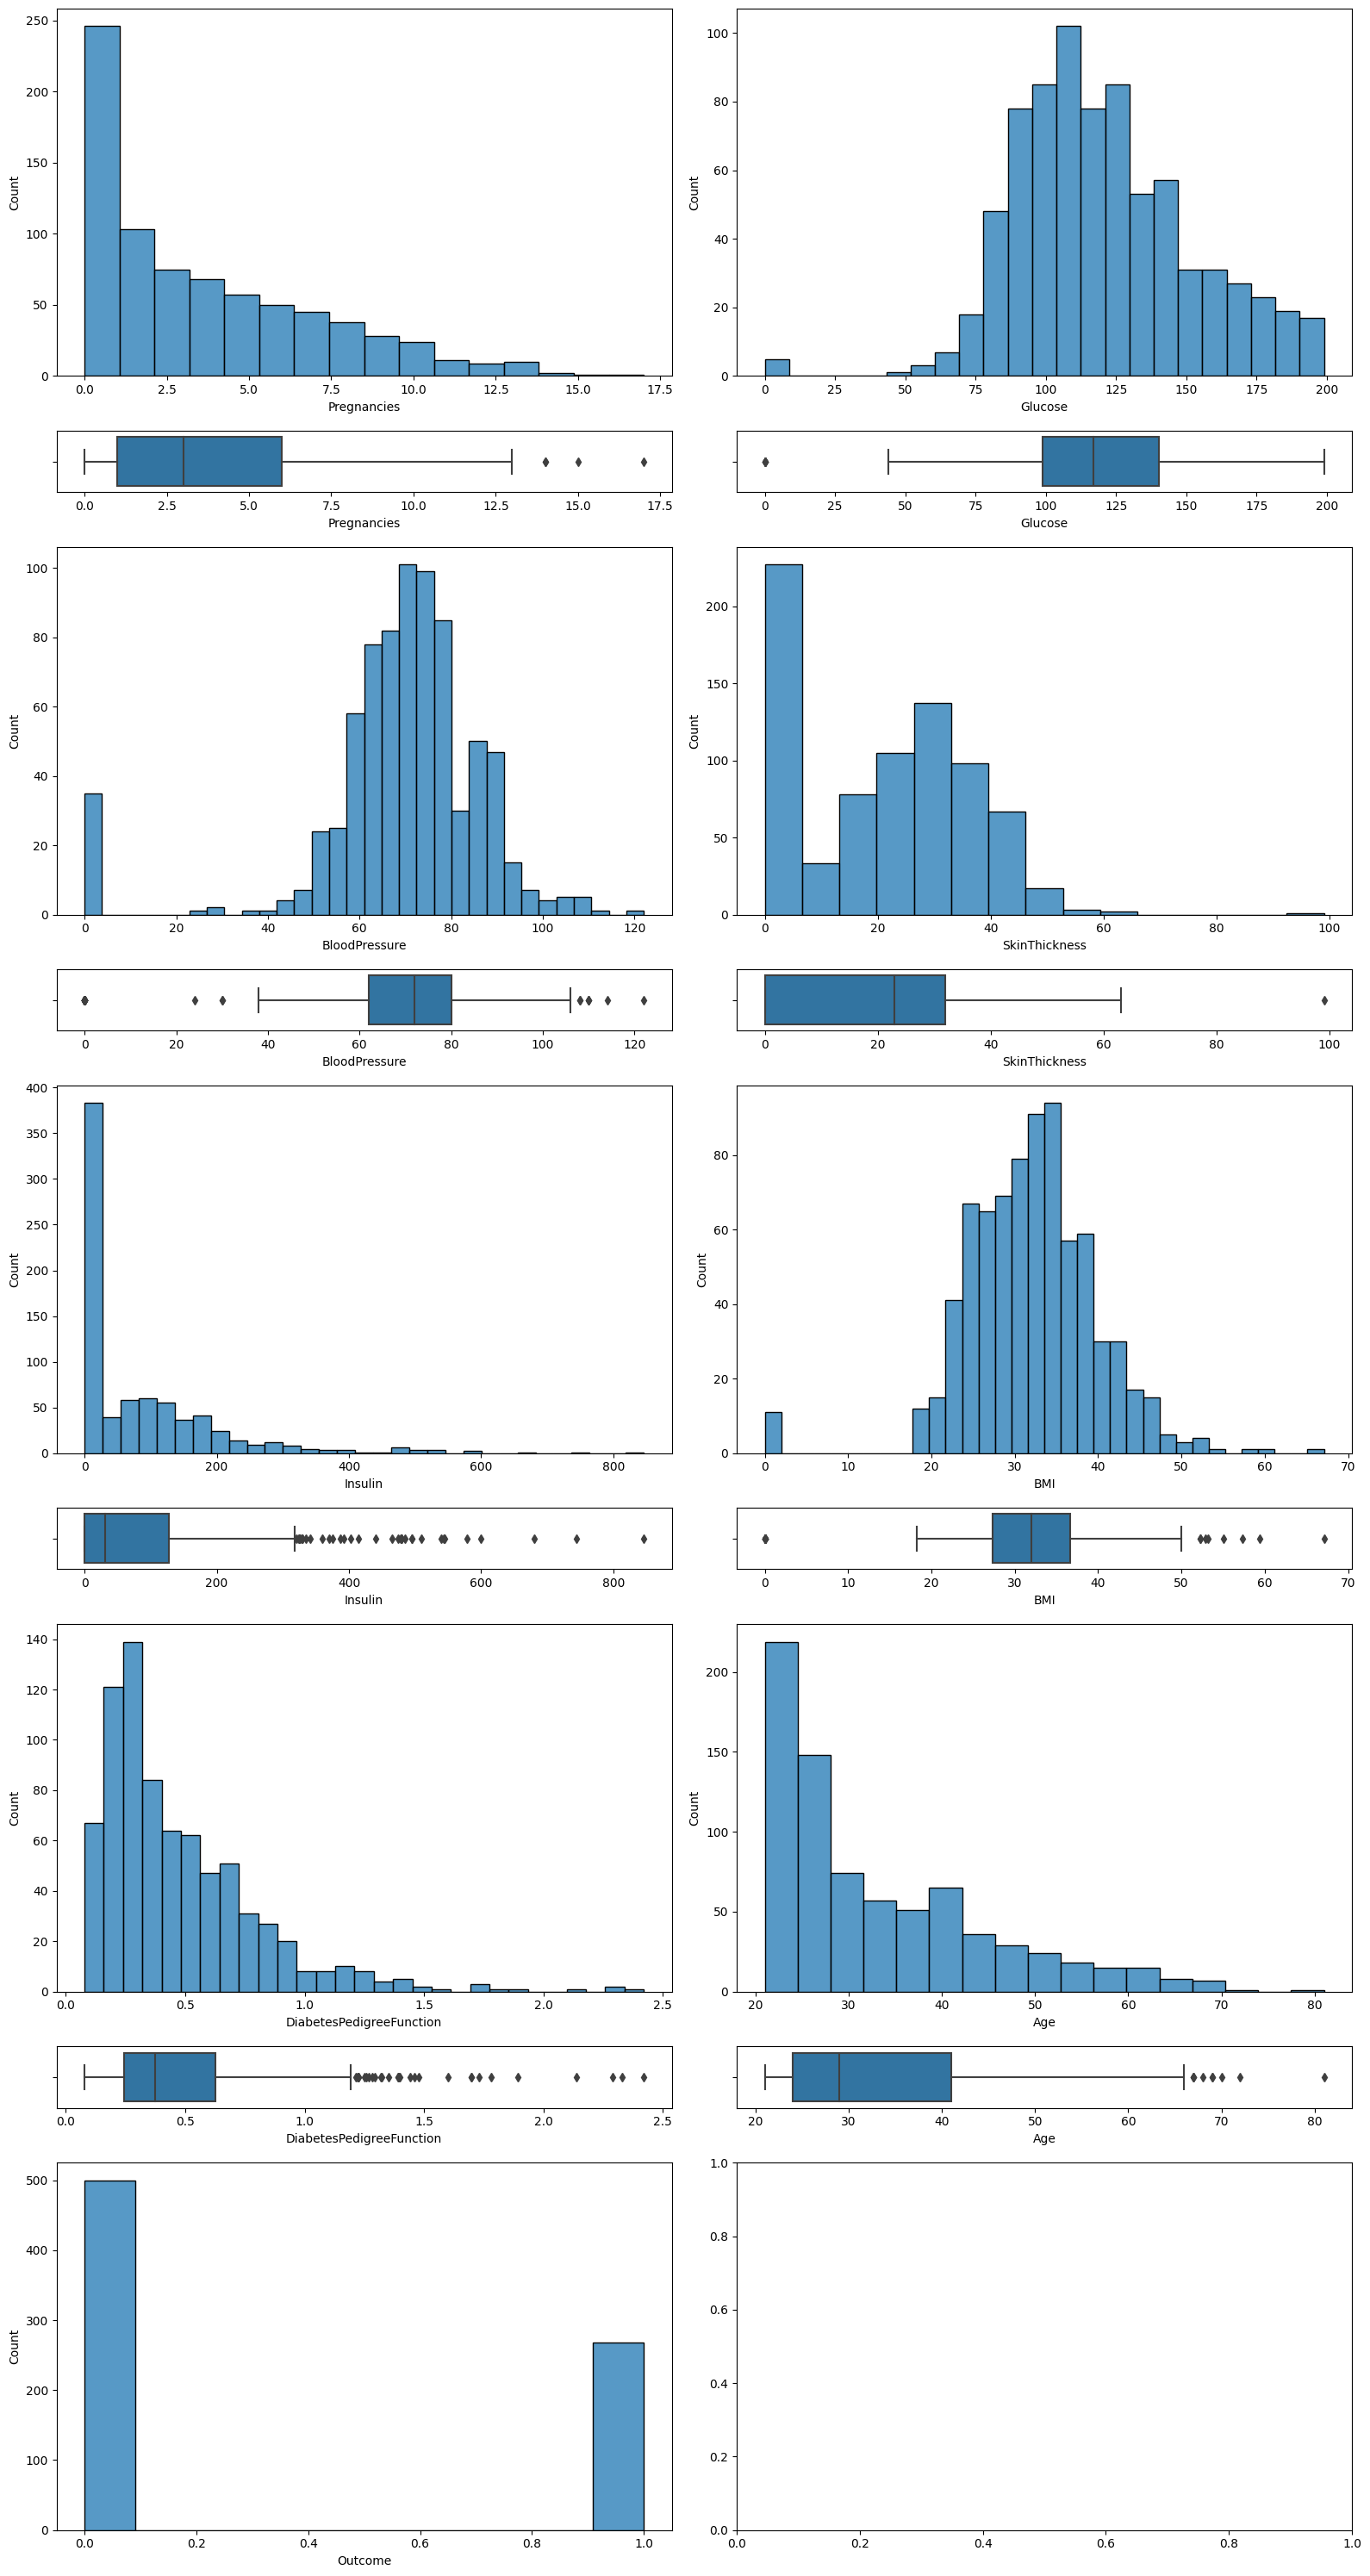

In [239]:
#Análisis sobre variables numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 9 filas y 2 columnas
fig, axis = plt.subplots(9, 2, figsize=(16, 30), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6]})

# Gráficos de la primera sección
sns.histplot(ax=axis[0, 0], data=dataframe, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=dataframe, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="Glucose")

# Gráficos de la segunda sección
sns.histplot(ax=axis[2, 0], data=dataframe, x="BloodPressure")
sns.boxplot(ax=axis[3, 0], data=dataframe, x="BloodPressure")
sns.histplot(ax=axis[2, 1], data=dataframe, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="SkinThickness")

# Gráficos de la tercera sección
sns.histplot(ax=axis[4, 0], data=dataframe, x="Insulin")
sns.boxplot(ax=axis[5, 0], data=dataframe, x="Insulin")
sns.histplot(ax=axis[4, 1], data=dataframe, x="BMI")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="BMI")

# Gráficos de la cuarta sección
sns.histplot(ax=axis[6, 0], data=dataframe, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[7, 0], data=dataframe, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[6, 1], data=dataframe, x="Age")
sns.boxplot(ax=axis[7, 1], data=dataframe, x="Age")

# Gráfico adicional para la variable 'Outcome'
sns.histplot(ax=axis[8, 0], data=dataframe, x="Outcome")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

conclusion:

vemos varios outliers por debajo de 0 que debemos eliminar

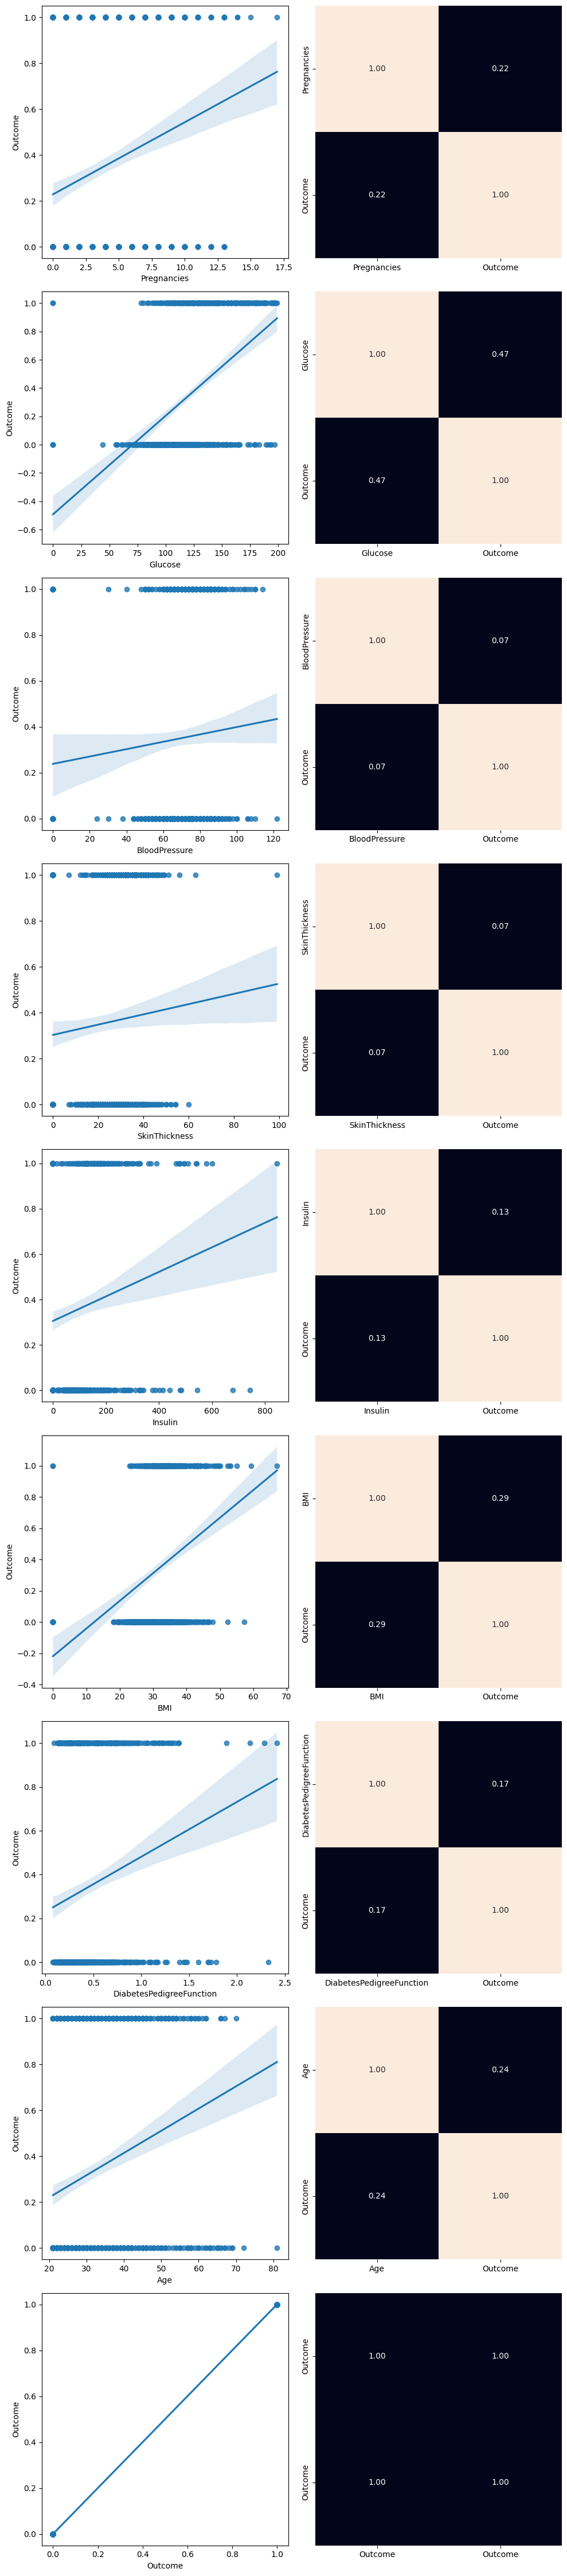

In [240]:
#analisis numerico-numerico


import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear una figura de subplots con configuración de filas y columnas
num_rows_diabetes = len(numeric_variables_diabetes)
fig_diabetes, axis_diabetes = plt.subplots(num_rows_diabetes, 2, figsize=(10, 5*num_rows_diabetes))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables_diabetes):
    sns.regplot(ax=axis_diabetes[i, 0], data=dataframe, x=var, y="Outcome")
    sns.heatmap(dataframe[[var, "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis_diabetes[i, 1], cbar=False)
    axis_diabetes[i, 0].set_ylabel("Outcome")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

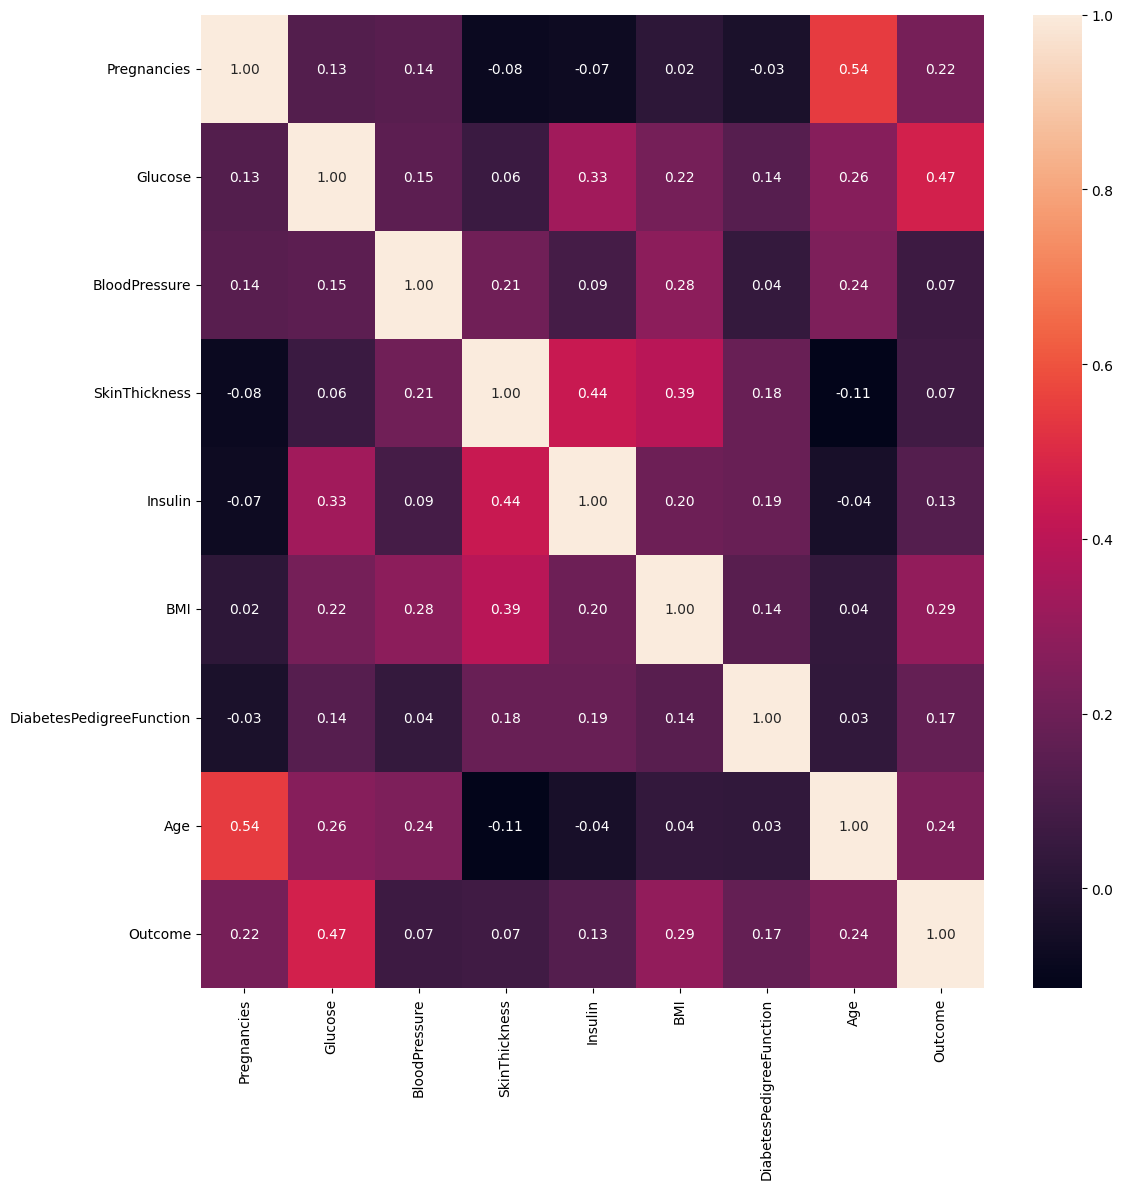

In [241]:
#analisis correlaciones

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear una figura de subplots con configuración de 1 fila y 1 columna
fig, axis = plt.subplots(figsize=(12, 12))

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = dataframe[numeric_variables].corr()

# Generar el heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=axis)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [242]:
#dibujar el pairplot

'''sns.pairplot(data = dataframe_filtered)'''

'sns.pairplot(data = dataframe_filtered)'

In [243]:
#análisis descriptivo

dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


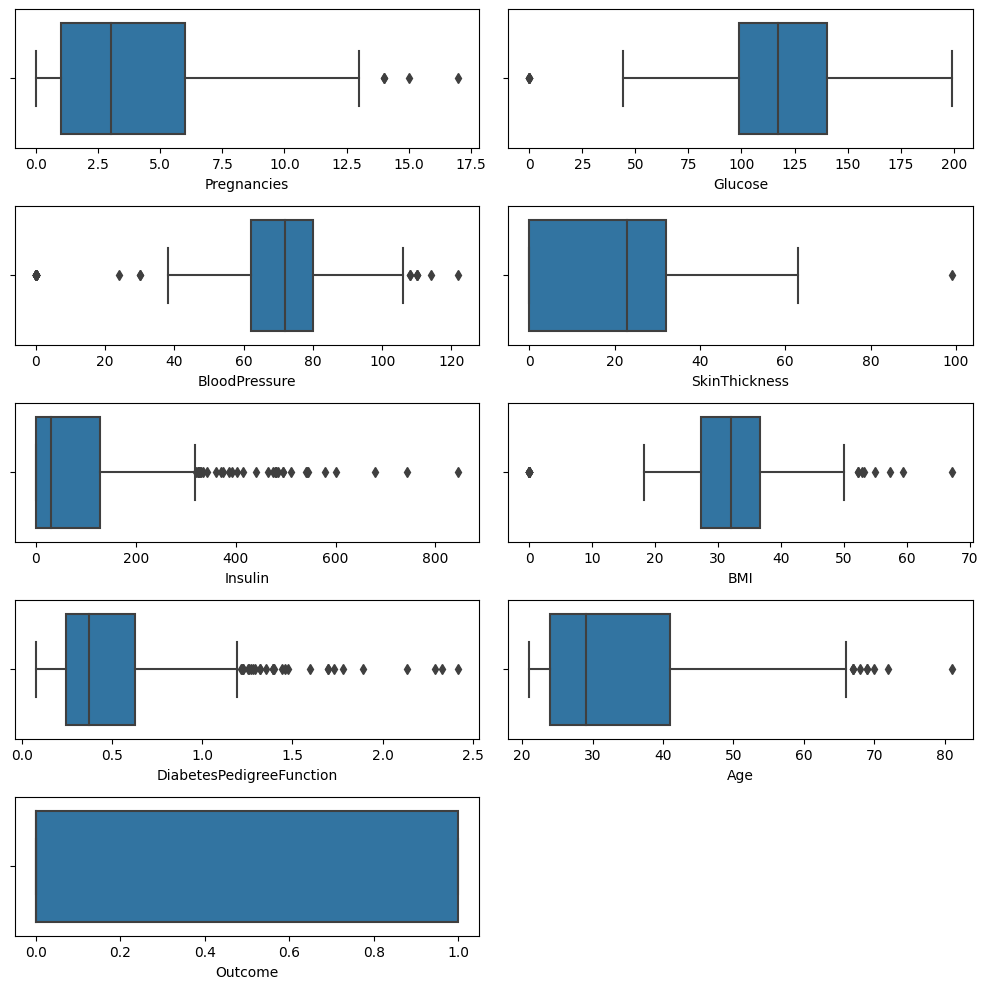

In [244]:
#Buscar outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Calcular el número necesario de filas y columnas para organizar los gráficos
num_rows_diabetes = (len(numeric_variables_diabetes) + 1) // 2  # Sumamos 1 para redondear hacia arriba

# Crear una figura de subplots con dos columnas y filas necesarias
fig_diabetes, axis_diabetes = plt.subplots(num_rows_diabetes, 2, figsize=(10, 2*num_rows_diabetes))

# Aplanar el array de ejes para facilitar el acceso a cada gráfico
axis_diabetes = axis_diabetes.flatten()

# Generar los gráficos de caja para identificar outliers en las variables numéricas
for i, var in enumerate(numeric_variables_diabetes):
    sns.boxplot(ax=axis_diabetes[i], data=dataframe, x=var)

# Si hay un número impar de variables, eliminar el último eje vacío
if len(numeric_variables_diabetes) % 2 != 0:
    fig_diabetes.delaxes(axis_diabetes[-1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [245]:
# Analizar outliers para cada variable seleccionada
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

for variable in numeric_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Pregnancies son 13.5 y -6.5, con un rango intercuartílico de 5.0

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Glucose son 202.12 y 37.12, con un rango intercuartílico de 41.25

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en BloodPressure son 107.0 y 35.0, con un rango intercuartílico de 18.0

count    768.000000

In [246]:
#eliminar outtliers

for variable in numeric_variables:
    # Obtener los límites para la búsqueda de outliers en la variable actual
    variable_stats = dataframe[variable].describe()
    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr
    
    # Eliminar outliers para la variable actual
    dataframe = dataframe[(dataframe[variable] >= lower_limit) & (dataframe[variable] <= upper_limit)]

# Mostrar el resumen estadístico actualizado para todas las variables
print(dataframe.describe())



       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   636.000000  636.000000     636.000000     636.000000  636.000000   
mean      3.786164  118.869497      72.007862      20.745283   69.017296   
std       3.251388   28.996773      11.301102      15.231688   83.601857   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  114.000000      72.000000      23.000000   42.500000   
75%       6.000000  136.250000      80.000000      32.000000  122.000000   
max      13.000000  198.000000     106.000000      60.000000  330.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  636.000000                636.000000  636.000000  636.000000  
mean    31.964151                  0.426237   32.555031    0.309748  
std      6.384132                  0.245088   10.879807    0.462754  
min     18.200000                  

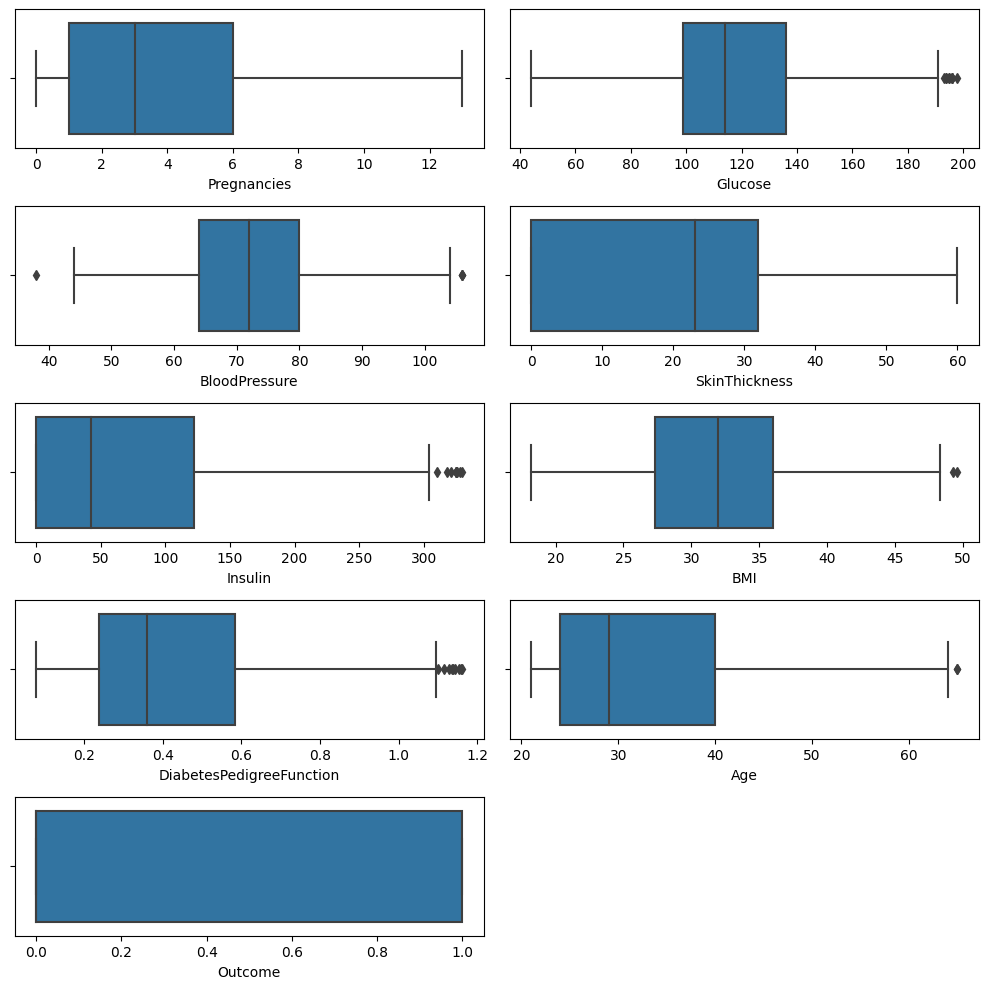

In [247]:
#volvemos a imprimir graficas para comprobar eliminacion de outliers

# Calcular el número necesario de filas y columnas para organizar los gráficos
num_rows = (len(numeric_variables) + 1) // 2  # Sumamos 1 para redondear hacia arriba

# Crear una figura de subplots con dos columnas y filas necesarias
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 2*num_rows))

# Aplanar el array de ejes para facilitar el acceso a cada gráfico
axis = axis.flatten()

# Generar los gráficos de caja para identificar outliers en las variables numéricas
for i, variable in enumerate(numeric_variables):
    plt.sca(axis[i])  # Set the current Axes
    sns.boxplot(data=dataframe, x=variable)

# Si hay un número impar de variables, eliminar el último eje vacío
if len(numeric_variables) % 2 != 0:
    fig.delaxes(axis[-1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [248]:
#Análisis de valores faltantes

dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [249]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler

# Variables numéricas seleccionadas
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear un DataFrame con las variables numéricas seleccionadas
dataframe_selected = dataframe[numeric_variables]

# Normalizar las variables numéricas
scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe_selected)

# Crear un DataFrame con las variables normalizadas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe_selected.index, columns=numeric_variables)
dataframe_norm.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.681426,1.005403,-0.000696,0.936596,-0.826197,0.256438,0.819791,1.604688,1.492791
1,-0.857590,-1.168963,-0.532036,0.542370,-0.826197,-0.840893,-0.307223,-0.143041,-0.669886
2,1.297032,2.213384,-0.709149,-1.363054,-0.826197,-1.358207,1.003543,-0.051055,1.492791
3,-0.857590,-1.030908,-0.532036,0.148145,0.299065,-0.605751,-1.058566,-1.062898,-0.669886
5,0.373623,-0.099037,0.176417,-1.363054,-0.826197,-0.997655,-0.919731,-0.235026,-0.669886
6,-0.241984,-1.410559,-1.948941,0.739483,0.227240,-0.151142,-0.727812,-0.602969,1.492791
10,0.065820,-0.306120,1.770436,-1.363054,-0.826197,0.883485,-0.960565,-0.235026,-0.669886
11,1.912638,1.695677,0.176417,-1.363054,-0.826197,0.946190,0.452286,0.132917,1.492791
14,0.373623,1.626650,-0.000696,-0.114673,1.268705,-0.966303,0.656455,1.696674,1.492791
16,-1.165393,-0.030010,1.061983,1.725047,1.927103,2.168931,0.509454,-0.143041,1.492791


In [250]:
#escalado minimo-maximo

from sklearn.preprocessing import MinMaxScaler

#Variables numéricas seleccionadas
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear un DataFrame con las variables numéricas seleccionadas
dataframe_selected = dataframe[numeric_variables]

# Escalar las variables numéricas utilizando MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dataframe_selected)

# Crear un DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scaled_features, index=dataframe_selected.index, columns=numeric_variables)
dataframe_scal.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.490446,0.506458,0.659091,1.0
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.267516,0.251845,0.227273,0.0
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.162420,0.547970,0.250000,1.0
3,0.076923,0.292208,0.411765,0.383333,0.284848,0.315287,0.082103,0.000000,0.0
5,0.384615,0.467532,0.529412,0.000000,0.000000,0.235669,0.113469,0.204545,0.0
6,0.230769,0.220779,0.176471,0.533333,0.266667,0.407643,0.156827,0.113636,1.0
10,0.307692,0.428571,0.794118,0.000000,0.000000,0.617834,0.104244,0.204545,0.0
11,0.769231,0.805195,0.529412,0.000000,0.000000,0.630573,0.423432,0.295455,1.0
14,0.384615,0.792208,0.500000,0.316667,0.530303,0.242038,0.469557,0.681818,1.0
16,0.000000,0.480519,0.676471,0.783333,0.696970,0.878981,0.436347,0.227273,1.0


In [251]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


# Transformar la variable objetivo y a binario
y = dataframe_scal["Outcome"]
y_bin = (y > 0.5).astype(int)

# Dividimos el conjunto de datos en entrenamiento (train) y pruebas (test)
X = dataframe_scal.drop("Outcome", axis=1)

# Aquí puedes utilizar "y" o "y_bin", dependiendo de si deseas la variable original o la binaria para el entrenamiento.
# Si utilizas "y", asegúrate de que "y" sea categórica o discreta (no valores continuos).
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Con un valor de k = 5, queremos decir implícitamente que queremos mantener las 5 mejores características en el conjunto de datos
selection_model = SelectKBest(chi2, k=3)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,Age
0,0.076923,0.441558,0.090909
1,0.153846,0.363636,0.113636
2,0.307692,0.480519,0.113636
3,0.384615,0.344156,0.704545
4,0.307692,0.506494,0.181818


In [252]:
X_test_sel.head()


,Pregnancies,Glucose,Age
0,0.692308,0.701299,0.272727
1,0.769231,0.370130,0.954545
2,0.153846,0.266234,0.136364
3,0.384615,0.668831,0.159091
4,0.307692,0.629870,0.431818


In [253]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\src\train_outcome.csv", index=False)
X_test_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\src\test_outcome.csv", index=False)



In [254]:
#importancia de cada variable

from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de DecisionTreeClassifier con los mejores hiperparámetros
model_grid = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento completo
model_grid.fit(X_train, y_train)

# Obtener la importancia de cada variable
feature_importance = model_grid.feature_importances_

# Crear un DataFrame para visualizar la importancia de cada variable
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1                   Glucose    0.531898
6  DiabetesPedigreeFunction    0.193415
7                       Age    0.160079
5                       BMI    0.065231
3             SkinThickness    0.030505
0               Pregnancies    0.012338
2             BloodPressure    0.006534
4                   Insulin    0.000000


## Paso 3: Construye un modelo de árbol de decisión

In [255]:
# Paso 1. Lectura del conjunto de datos procesado

from sklearn.model_selection import train_test_split

# Cargar los datos desde la ruta del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']



In [256]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [257]:

# Crear el modelo de Árbol de Decisión

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)



In [258]:
# Entrenar el modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [259]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7467532467532467


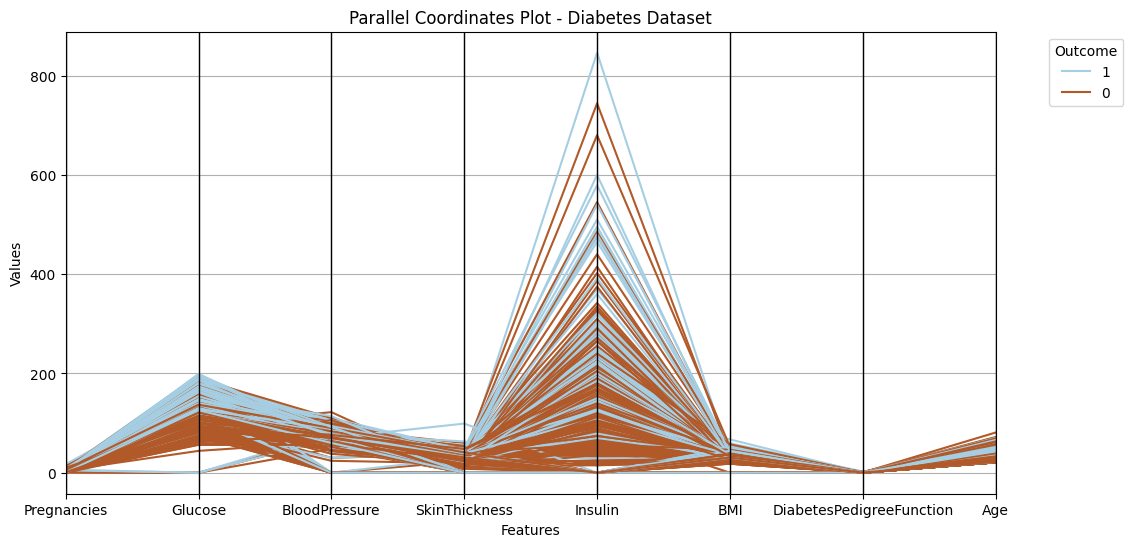

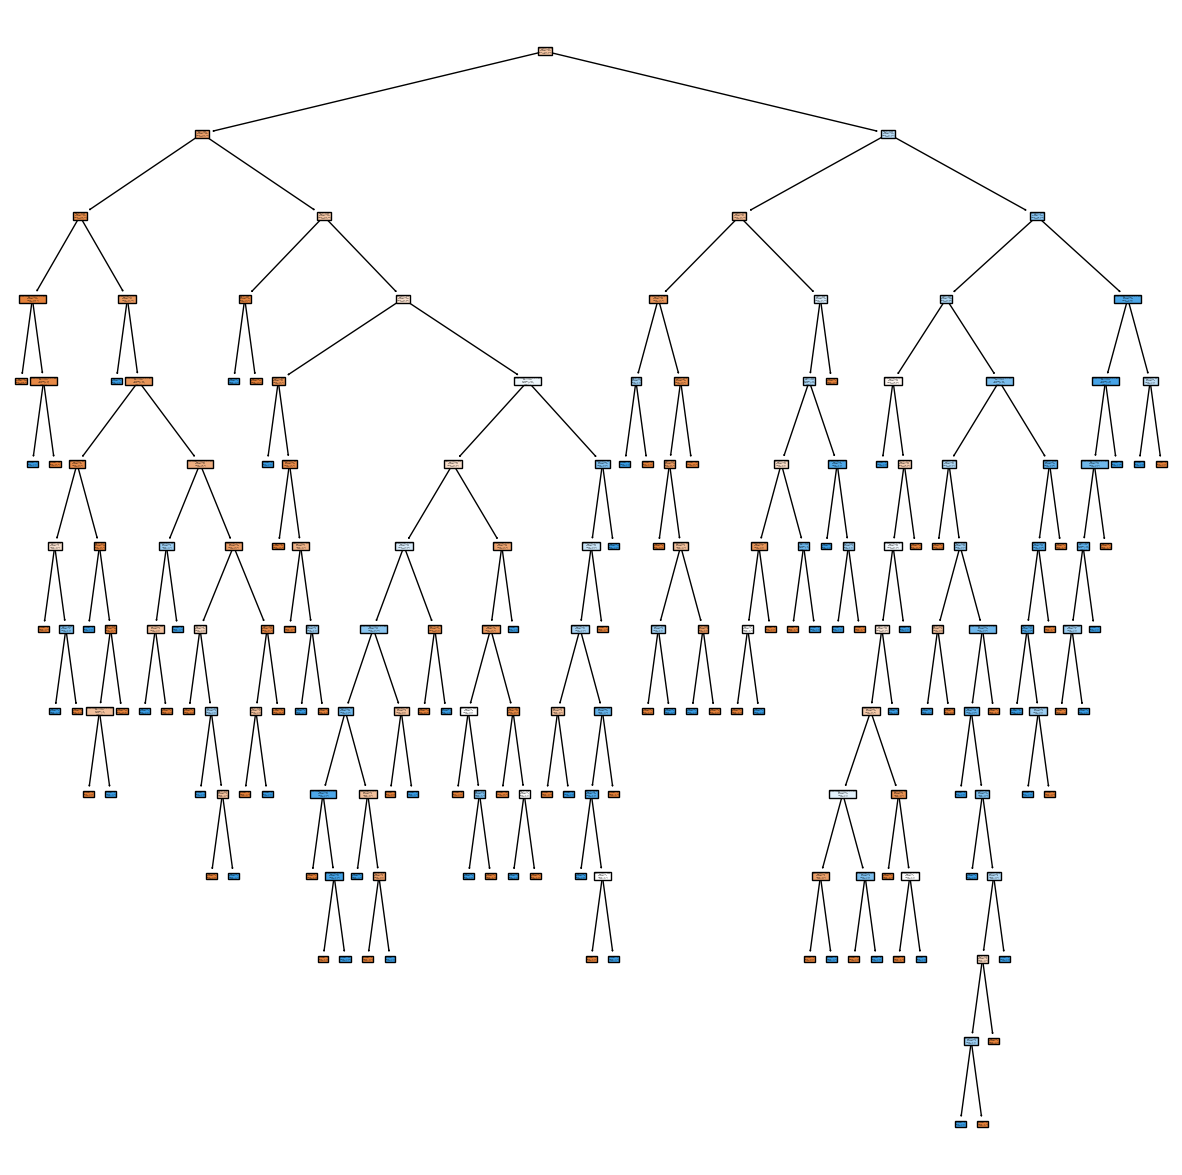

Precisión del modelo: 0.7467532467532467


In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree


# Cargar los datos desde la ruta del dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Añadir el gráfico parallel_coordinates para visualizar las características
data['Outcome'] = y
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data, 'Outcome', colormap='Paired')
plt.title("Parallel Coordinates Plot - Diabetes Dataset")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 15))
tree.plot_tree(clf,
               feature_names=list(X_train.columns),
               class_names=["0", "1"],
               filled=True)
plt.show()

# Predecir las etiquetas para el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


## Paso 4: optimizacion del resultado con GRID SEARCH

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo de Árbol de Decisión
clf = DecisionTreeClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV para realizar el Grid Search
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')



In [262]:
# Entrenar el modelo con el conjunto de entrenamiento y realizar el Grid Search
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el modelo con la mejor combinación
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [263]:
# Predecir las etiquetas para el conjunto de prueba con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Calcular la precisión del modelo con los mejores hiperparámetros
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [264]:
# añadimos esos hiperparametros y repetimos entrenamiento

model_grid = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4, min_samples_split = 2)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
print("Precisión con mejores hiperparámetros:", accuracy_best)

Precisión con mejores hiperparámetros: 0.7597402597402597
